In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Columns
- encounter_id - Unique identifier of the encounter
- [x] country - country 
- patient_id - Identifier of the patient
- [x] race - Patient’s race
- [x] gender - Patient’s gender
- [x] age - Patient’s age bracket
- weight - Patient’s weight
- [x] payer_code - Code of the health insurance provider (if there is one)
- [x] outpatient_visits_in_previous_year - Number of outpatient visits (visits made with the intention of leaving on the same day) the patient made to the hospital in the year preceding the encounter
- [x] emergency_visits_in_previous_year - Number of emergency visits the patient made to the hospital in the year preceding the encounter
- [x] inpatient_visits_in_previous_year - Number of inpatient visits (visits with the intention to stay overnight) the patient made to the hospital in the year preceding the encounter
- admission_type - Type of admission of the patient (e.g. Emergency, Urgent,etc…)
- medical_specialty - Medical specialty on which the patient was admitted
- average_pulse_bpm - Average pulse of the patient during their stay in the hospital in beats per minute
- [x] discharge_disposition - Source of the patient before being admitted in the current encounter
- length_of_stay_in_hospital - Number of days between admission and discharge
- number_lab_tests - Number of lab tests performed during the encounter
- non_lab_procedures - Number of non-lab procedures performed during the encounter
- number_of_medications - Number of distinct types of medication administered during the encounter
- primary_diagnosis - Primary diagnosis (coded as first three digits of ICD9)
- secondary_diagnosis - Secondary diagnosis (first three digits of ICD9)
- additional_diagnosis - Additional secondary diagnosis (first three digits of ICD9)
- number_diagnoses - Number of diagnoses entered to the system
- glucose_test_result - Range of the glucose test results or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
- a1c_test_result - Range of the A1C test results or if the test was not taken.Values: “>8” if greater than 8%, “>7” if greater than 7% but less than 8%, “normal” if less than 7%, and “none” if not measured.
- change_in_meds_during_hospitalization - Indicates if there was a change in diabetic medications (dosage or generic name). Values: “change” and “no change”
- prescribed_diabetes_meds - Yes if patient has diabetes medication prescribed. No otherwise.
- medication - List containing all generic names for the medications prescribed to the patient during the encounter. Empty list if no medication was prescribed.
- readmitted_binary - Binary target: Yes if patient was readmitted in less than 30 days, No otherwise.
- readmitted_multiclass - Multiclass target: “<30 days” if the patient was readmitted in less than 30 days after discharge. “>30 days if the patient was readmitted to the hospital but only after more than 30 days after the current discharge. No otherwise.

In [50]:
df_train = pd.read_csv('Data/train.csv')
df_train.head()
#fill missing values with NaN
df_train.replace('?', np.nan, inplace = True)
df_train.replace('Not Mapped', np.nan, inplace = True)
#since we know that NaN is value for no provider let's replace it
df_train['payer_code'].fillna('No provider', inplace = True)

In [51]:
df_test = pd.read_csv('Data/test.csv')
df_test.head()
#fill missing values with NaN
df_test.replace('?', np.nan, inplace = True)
df_test.replace('Not Mapped', np.nan, inplace = True)
#since we know that NaN is value for no provider let's replace it
df_test['payer_code'].fillna('No provider', inplace = True)
df_test

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,USA,103232799,Caucasian,Male,[80-90),NaN,HM,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,USA,93395304,Caucasian,Male,[20-30),NaN,HM,0,0,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,USA,6281586,AfricanAmerican,Male,[30-40),NaN,No provider,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,USA,67381308,Caucasian,Male,[50-60),NaN,BC,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,USA,71670204,Caucasian,Male,[60-70),NaN,No provider,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,451150,USA,85707450,Caucasian,Male,[70-80),NaN,HM,0,0,...,11,584,276,276,9,NaN,NaN,No,No,[]
30526,549298,USA,328887,Caucasian,Male,[60-70),NaN,No provider,0,0,...,19,428,250.83,276,9,NaN,NaN,No,Yes,['insulin']
30527,327586,USA,21915459,Caucasian,Female,[80-90),NaN,No provider,0,0,...,22,996,403,250,6,NaN,NaN,No,Yes,['insulin']
30528,351214,USA,17823546,Caucasian,Male,NaN,NaN,MC,0,0,...,21,153,780,285,5,NaN,>7,Ch,Yes,"['glipizide', 'pioglitazone', 'insulin']"


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           71236 non-null  int64 
 1   country                                71236 non-null  object
 2   patient_id                             71236 non-null  int64 
 3   race                                   66166 non-null  object
 4   gender                                 71236 non-null  object
 5   age                                    67679 non-null  object
 6   weight                                 2246 non-null   object
 7   payer_code                             71236 non-null  object
 8   outpatient_visits_in_previous_year     71236 non-null  int64 
 9   emergency_visits_in_previous_year      71236 non-null  int64 
 10  inpatient_visits_in_previous_year      71236 non-null  int64 
 11  admission_type 

In [53]:
#making target variable numerical
df_train['readmitted_binary'] = df_train['readmitted_binary'].replace({'Yes': 1, 'No': 0}).astype(int)
#binary encoding of gender
df_train['gender'] = df_train['gender'].replace({'Female': 1, 'Male': 0, 'Unknown/Invalid': np.nan}).astype(float)
#encoding age as label encoding with bigger number if the age is bigger
df_train['age'] = df_train['age'].replace({'[0-10)': 0,
                                           '[10-20)': 1,
                                           '[20-30)': 2,
                                           '[30-40)': 3,
                                           '[40-50)': 4,
                                           '[50-60)': 5,
                                           '[60-70)': 6,
                                           '[70-80)': 7,
                                           '[80-90)': 8,
                                           '[90-100)': 9})
#all patients are from USA so country is irrelevant feature
df_train.drop(columns = ['country'], inplace = True)
#less than 5% of observation has weight measure
#so, we'll just replace it with binary variable indicating observation has weight value or not
df_train['weight'] = df_train['weight'].apply(lambda x: 0 if pd.isna(x) else 1)

df_train.head()

,encounter_id,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,70110,Caucasian,1.0,7.0,0,No provider,0,0,2,...,276,466,8,NaN,NaN,No,No,[],0,>30 days
1,426224,29775006,AfricanAmerican,0.0,5.0,0,No provider,0,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],0,No
2,634063,80729253,Caucasian,1.0,6.0,0,No provider,0,0,1,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",0,No
3,890610,2919042,AfricanAmerican,0.0,6.0,0,MC,0,0,1,...,562,455,5,NaN,NaN,No,No,[],0,No
4,654194,84871971,Caucasian,1.0,7.0,0,HM,1,0,0,...,599,428,9,NaN,NaN,No,No,[],0,>30 days


In [54]:
#binary encoding of gender
df_test['gender'] = df_test['gender'].replace({'Female': 1, 'Male': 0, 'Unknown/Invalid': np.nan}).astype(float)
#encoding age as label encoding with bigger number if the age is bigger
df_test['age'] = df_test['age'].replace({'[0-10)': 0,
                                           '[10-20)': 1,
                                           '[20-30)': 2,
                                           '[30-40)': 3,
                                           '[40-50)': 4,
                                           '[50-60)': 5,
                                           '[60-70)': 6,
                                           '[70-80)': 7,
                                           '[80-90)': 8,
                                           '[90-100)': 9})
#all patients are from USA so country is irrelevant feature
df_test.drop(columns = ['country'], inplace = True)
#less than 5% of observation has weight measure
#so, we'll just replace it with binary variable indicating observation has weight value or not
df_test['weight'] = df_test['weight'].apply(lambda x: 0 if pd.isna(x) else 1)

df_test


,encounter_id,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,103232799,Caucasian,0.0,8.0,0,HM,0,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,93395304,Caucasian,0.0,2.0,0,HM,0,0,1,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,6281586,AfricanAmerican,0.0,3.0,0,No provider,0,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,67381308,Caucasian,0.0,5.0,0,BC,0,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,71670204,Caucasian,0.0,6.0,0,No provider,0,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,451150,85707450,Caucasian,0.0,7.0,0,HM,0,0,0,...,11,584,276,276,9,NaN,NaN,No,No,[]
30526,549298,328887,Caucasian,0.0,6.0,0,No provider,0,0,4,...,19,428,250.83,276,9,NaN,NaN,No,Yes,['insulin']
30527,327586,21915459,Caucasian,1.0,8.0,0,No provider,0,0,0,...,22,996,403,250,6,NaN,NaN,No,Yes,['insulin']
30528,351214,17823546,Caucasian,0.0,NaN,0,MC,0,0,0,...,21,153,780,285,5,NaN,>7,Ch,Yes,"['glipizide', 'pioglitazone', 'insulin']"


In [55]:
#Let's consider only most popular providers (>1% of dataset) and group all others to another group
cnt = df_train[['payer_code', 'encounter_id']].groupby(by = 'payer_code').count().sort_values(by='encounter_id', ascending = False)
share = cnt/df_train['payer_code'].count()
big_share = share > 0.01
big_share_providers = list(big_share[big_share['encounter_id'] == True].index)
df_train['payer_code'] = df_train['payer_code'].apply(lambda x: x if x in big_share_providers else 'Other provider')
#one hot encoding for this variable since it has no order
#use drop='first' to avoid multicollinearity
encoder_payer_code = OneHotEncoder(sparse_output = False, drop='first')
one_hot_encoded = encoder_payer_code.fit_transform(df_train['payer_code'].values.reshape(-1, 1))
#concatenate the one-hot encoded df with df_train
df_train = pd.concat([df_train, pd.DataFrame(one_hot_encoded, columns=encoder_payer_code.get_feature_names_out(['payer_code']))], axis=1)
#drop original column since we don't need it anymore for model training
df_train.drop(columns = ['payer_code'], inplace = True)
df_train.columns

Index(['encounter_id', 'patient_id', 'race', 'gender', 'age', 'weight',
       'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication', 'readmitted_binary', 'readmitted_multiclass',
       'payer_code_CM', 'payer_code_CP', 'payer_code_HM', 'payer_code_MC',
       'payer_code_MD', 'payer_code_No provider', 'payer_code_OG',
       'payer_code_Other provider', 'payer_code_SP', 'payer_code_UN'],
      dtype='object')

In [56]:
#Let's consider only most popular providers (>1% of dataset) and group all others to another group
cnt = df_test[['payer_code', 'encounter_id']].groupby(by = 'payer_code').count().sort_values(by='encounter_id', ascending = False)
share = cnt/df_test['payer_code'].count()
big_share = share > 0.01
big_share_providers = list(big_share[big_share['encounter_id'] == True].index)
df_test['payer_code'] = df_test['payer_code'].apply(lambda x: x if x in big_share_providers else 'Other provider')
#one hot encoding for this variable since it has no order
#use drop='first' to avoid multicollinearity
encoder_payer_code = OneHotEncoder(sparse_output = False, drop='first')
one_hot_encoded = encoder_payer_code.fit_transform(df_test['payer_code'].values.reshape(-1, 1))
#concatenate the one-hot encoded df with df_test
df_test = pd.concat([df_test, pd.DataFrame(one_hot_encoded, columns=encoder_payer_code.get_feature_names_out(['payer_code']))], axis=1)
#drop original column since we don't need it anymore for model training
df_test.drop(columns = ['payer_code'], inplace = True)
df_test

,encounter_id,patient_id,race,gender,age,weight,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,medication,payer_code_CM,payer_code_CP,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_No provider,payer_code_Other provider,payer_code_SP,payer_code_UN
0,499502,103232799,Caucasian,0.0,8.0,0,0,0,0,Emergency,...,['metformin'],0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,447319,93395304,Caucasian,0.0,2.0,0,0,0,1,Emergency,...,[],0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,309126,6281586,AfricanAmerican,0.0,3.0,0,0,0,0,Emergency,...,['insulin'],0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,181183,67381308,Caucasian,0.0,5.0,0,0,0,0,Not Available,...,"['metformin', 'glyburide', 'insulin']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,359339,71670204,Caucasian,0.0,6.0,0,0,0,0,Emergency,...,['metformin'],0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,451150,85707450,Caucasian,0.0,7.0,0,0,0,0,Emergency,...,[],0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30526,549298,328887,Caucasian,0.0,6.0,0,0,0,4,Emergency,...,['insulin'],0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30527,327586,21915459,Caucasian,1.0,8.0,0,0,0,0,Emergency,...,['insulin'],0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30528,351214,17823546,Caucasian,0.0,NaN,0,0,0,0,Urgent,...,"['glipizide', 'pioglitazone', 'insulin']",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#Let's do one hot encoding for race variable 
#Let's keep NaN as extra column since we don't know the exact reason why is it empty and might need it later
encoder_race = OneHotEncoder(sparse_output = False, drop='first')
one_hot_encoded = encoder_race.fit_transform(df_train['race'].values.reshape(-1, 1))
#concatenate the one-hot encoded df with df_train
df_train = pd.concat([df_train, pd.DataFrame(one_hot_encoded, columns=encoder_race.get_feature_names_out(['race']))], axis=1)
#drop original column since we don't need it anymore for model training
df_train.columns

Index(['encounter_id', 'patient_id', 'race', 'gender', 'age', 'weight',
       'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication', 'readmitted_binary', 'readmitted_multiclass',
       'payer_code_CM', 'payer_code_CP', 'payer_code_HM', 'payer_code_MC',
       'payer_code_MD', 'payer_code_No provider', 'payer_code_OG',
       'payer_code_Other provider', 'payer_code_SP', 'payer_code_UN',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
   

In [58]:
one_hot_encoded_test = encoder_race.transform(df_test['race'].values.reshape(-1, 1))
#concatenate the one-hot encoded df with df_test
df_test = pd.concat([df_test, pd.DataFrame(one_hot_encoded_test, columns=encoder_race.get_feature_names_out(['race']))], axis=1)
#drop original column since we don't need it anymore for model training
df_test

,encounter_id,patient_id,race,gender,age,weight,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,payer_code_MD,payer_code_No provider,payer_code_Other provider,payer_code_SP,payer_code_UN,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_nan
0,499502,103232799,Caucasian,0.0,8.0,0,0,0,0,Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,447319,93395304,Caucasian,0.0,2.0,0,0,0,1,Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,309126,6281586,AfricanAmerican,0.0,3.0,0,0,0,0,Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,181183,67381308,Caucasian,0.0,5.0,0,0,0,0,Not Available,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,359339,71670204,Caucasian,0.0,6.0,0,0,0,0,Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,451150,85707450,Caucasian,0.0,7.0,0,0,0,0,Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30526,549298,328887,Caucasian,0.0,6.0,0,0,0,4,Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30527,327586,21915459,Caucasian,1.0,8.0,0,0,0,0,Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30528,351214,17823546,Caucasian,0.0,NaN,0,0,0,0,Urgent,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


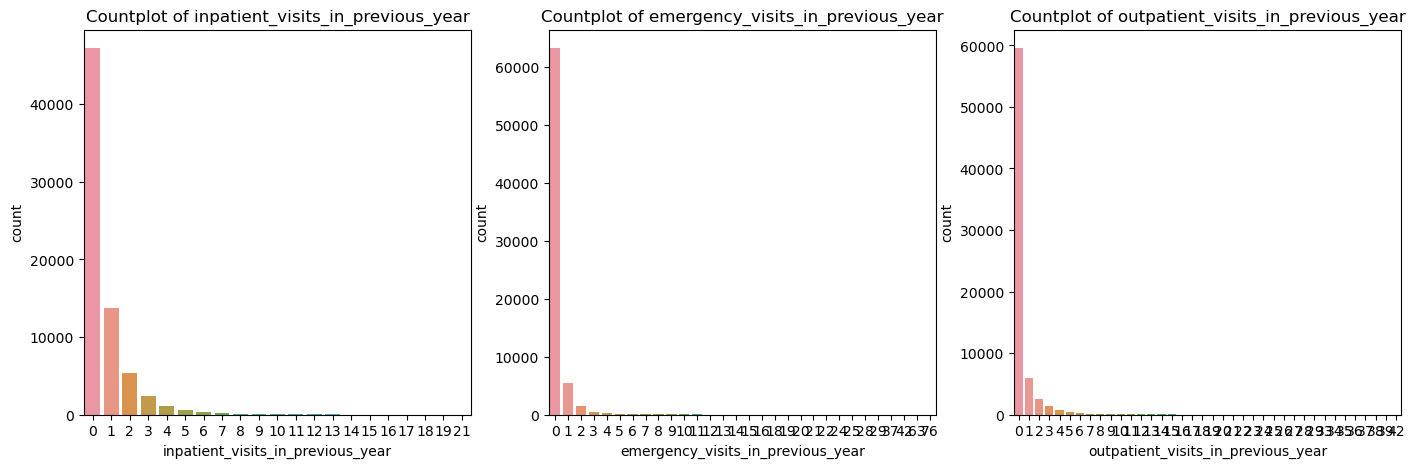

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

sns.countplot(x='inpatient_visits_in_previous_year', data=df_train, ax=axes[0])
sns.countplot(x='emergency_visits_in_previous_year', data=df_train, ax=axes[1])
sns.countplot(x='outpatient_visits_in_previous_year', data=df_train, ax=axes[2])
axes[0].set_title("Countplot of inpatient_visits_in_previous_year")
axes[1].set_title("Countplot of emergency_visits_in_previous_year")
axes[2].set_title("Countplot of outpatient_visits_in_previous_year")
plt.show()

In [60]:
# since more than 5 visits in each category is very rare but may be important indicator 
# we will cut distributions to 5 for these 3 variables
df_train['outpatient_visits_in_previous_year'] = df_train['outpatient_visits_in_previous_year'].apply(lambda x: 5 if x>5 else x)
df_train['emergency_visits_in_previous_year'] = df_train['emergency_visits_in_previous_year'].apply(lambda x: 5 if x>5 else x)
df_train['inpatient_visits_in_previous_year'] = df_train['inpatient_visits_in_previous_year'].apply(lambda x: 5 if x>5 else x)

In [61]:
# since more than 5 visits in each category is very rare but may be important indicator 
# we will cut distributions to 5 for these 3 variables
df_test['outpatient_visits_in_previous_year'] = df_test['outpatient_visits_in_previous_year'].apply(lambda x: 5 if x>5 else x)
df_test['emergency_visits_in_previous_year'] = df_test['emergency_visits_in_previous_year'].apply(lambda x: 5 if x>5 else x)
df_test['inpatient_visits_in_previous_year'] = df_test['inpatient_visits_in_previous_year'].apply(lambda x: 5 if x>5 else x)

In [62]:
# lets check for most popular categories that have most connection with target and do binary for them
# create variable is_expired since cannot come again
# rehab is important - higher chance of coming again
# going home or hospice is important - lower chance of coming again 
# another instition is important - higher chance of coming again
# psychiatric is important - higher chance of coming again
cnt = df_train[['encounter_id','discharge_disposition']].groupby(by = 'discharge_disposition').count().sort_values(by = 'encounter_id', ascending=False).head(50)
mean = df_train[['readmitted_binary','discharge_disposition']].groupby(by = 'discharge_disposition').mean().sort_values(by = 'readmitted_binary', ascending=False).head(50)
pd.concat([cnt, mean], axis = 1)

,encounter_id,readmitted_binary
discharge_disposition,,
Discharged to home,42256,0.092744
Discharged/transferred to SNF,9780,0.146217
Discharged/transferred to home with home health service,9005,0.126374
Discharged/transferred to another short term hospital,1488,0.165323
Discharged/transferred to another rehab fac including rehab units of a hospital .,1393,0.278536
Expired,1135,0.000000
Discharged/transferred to another type of inpatient care institution,822,0.209246
Discharged/transferred to ICF,571,0.124343
Left AMA,421,0.147268


In [63]:
df_train['discharged_home_hospice'] = df_train['discharge_disposition'].apply(lambda x: 
                                                                              1 if (x == 'Discharged to home'
                                                                                   or x == 'Hospice / medical facility'
                                                                                   or x == 'Hospice / home')
                                                                              else 0)
df_train['expired'] = df_train['discharge_disposition'].apply(lambda x: 1 if x == 'Expired' else 0)
df_train['transferred_rehub'] = df_train['discharge_disposition'].apply(lambda x: 
                                                                        1 if x == 'Discharged/transferred to another rehab fac including rehab units of a hospital' else 0)
df_train['transferred_another_institution'] = df_train['discharge_disposition'].apply(lambda x: 
                                                                      1 if x == 'Discharged/transferred to another type of inpatient care institution' else 0)
df_train['transferred_psychiatric_hospital'] = df_train['discharge_disposition'].apply(lambda x: 
                                                                      1 if x == 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital	' else 0)


In [64]:
df_test['discharged_home_hospice'] = df_test['discharge_disposition'].apply(lambda x: 
                                                                              1 if (x == 'Discharged to home'
                                                                                   or x == 'Hospice / medical facility'
                                                                                   or x == 'Hospice / home')
                                                                              else 0)
df_test['expired'] = df_test['discharge_disposition'].apply(lambda x: 1 if x == 'Expired' else 0)
df_test['transferred_rehub'] = df_test['discharge_disposition'].apply(lambda x: 
                                                                        1 if x == 'Discharged/transferred to another rehab fac including rehab units of a hospital' else 0)
df_test['transferred_another_institution'] = df_test['discharge_disposition'].apply(lambda x: 
                                                                      1 if x == 'Discharged/transferred to another type of inpatient care institution' else 0)
df_test['transferred_psychiatric_hospital'] = df_test['discharge_disposition'].apply(lambda x: 
                                                                      1 if x == 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital	' else 0)


In [65]:
#binary idetifier if there was medication or not
df_train['medication_binary'] = df_train['medication'].apply(lambda x: 0 if x == '[]' else (1 if len(str(x)) > 2 else np.nan))

df_test['medication_binary'] = df_test['medication'].apply(lambda x: 0 if x == '[]' else (1 if len(str(x)) > 2 else np.nan))

In [66]:
medication_list = []
for i in df_train['medication']:
    i = i.replace('[', '').replace(']', '').replace("'", '')
    x = i.strip().split(',')
    for j in x:
        if len(j) > 0:
            medication_list.append(j.strip())
medication_list = list(set(medication_list))
medication_list

['metformin-rosiglitazone',
 'glimepiride',
 'repaglinide',
 'glimepiride-pioglitazone',
 'glipizide',
 'glyburide-metformin',
 'glipizide-metformin',
 'tolbutamide',
 'tolazamide',
 'chlorpropamide',
 'glyburide',
 'miglitol',
 'acarbose',
 'pioglitazone',
 'nateglinide',
 'insulin',
 'metformin',
 'troglitazone',
 'metformin-pioglitazone',
 'rosiglitazone',
 'acetohexamide']

In [67]:
for i in medication_list:
    df_train[i] = df_train['medication'].astype(str).apply(lambda x: 1 if i in x else 0)
    df_test[i] = df_test['medication'].astype(str).apply(lambda x: 1 if i in x else 0)

In [68]:
for i in medication_list:
    cnt = df_train[['encounter_id',i]].groupby(by = i).count().sort_values(by = 'encounter_id', ascending=False).head(50)
    mean = df_train[['readmitted_binary',i]].groupby(by = i).mean().sort_values(by = 'readmitted_binary', ascending=False).head(50)
    print(pd.concat([cnt, mean], axis = 1))

                         encounter_id  readmitted_binary
metformin-rosiglitazone                                 
0                               71235           0.111602
1                                   1           0.000000
             encounter_id  readmitted_binary
glimepiride                                 
0                   67661           0.112310
1                    3575           0.098182
             encounter_id  readmitted_binary
repaglinide                                 
0                   70158           0.111192
1                    1078           0.138219
                          encounter_id  readmitted_binary
glimepiride-pioglitazone                                 
0                                71235           0.111602
1                                    1           0.000000
           encounter_id  readmitted_binary
glipizide                                 
0                 62321           0.111616
1                  8915           0.111497
        

In [69]:
cnt = df_train[['encounter_id','medication_binary']].groupby(by = 'medication_binary').count().sort_values(by = 'encounter_id', ascending=False).head(50)
mean = df_train[['readmitted_binary','medication_binary']].groupby(by = 'medication_binary').mean().sort_values(by = 'readmitted_binary', ascending=False).head(50)
pd.concat([cnt, mean], axis = 1)

,encounter_id,readmitted_binary
medication_binary,,
1,54890,0.116305
0,16346,0.095803


In [70]:
d = pd.concat([df_train['primary_diagnosis'].astype(str).apply(lambda x: x if '250' in x else np.nan),
    df_train['secondary_diagnosis'].astype(str).apply(lambda x: x if '250' in x else np.nan),
    df_train['additional_diagnosis'].astype(str).apply(lambda x: x if '250' in x else np.nan)], axis = 1)
d.fillna('q', inplace = True)
df_train['diabetes_diagnosis'] = (d['secondary_diagnosis']+d['primary_diagnosis']+d['additional_diagnosis']).apply(lambda x: x.replace('q', ''))

In [71]:
d = pd.concat([df_test['primary_diagnosis'].astype(str).apply(lambda x: x if '250' in x else np.nan),
    df_test['secondary_diagnosis'].astype(str).apply(lambda x: x if '250' in x else np.nan),
    df_test['additional_diagnosis'].astype(str).apply(lambda x: x if '250' in x else np.nan)], axis = 1)
d.fillna('q', inplace = True)
df_test['diabetes_diagnosis'] = (d['secondary_diagnosis']+d['primary_diagnosis']+d['additional_diagnosis']).apply(lambda x: x.replace('q', ''))


In [72]:
#creating 3 variables: visited before, num_visits_before, readmitted_before
#can also create readmitted previous visit
same_patient = pd.merge(df_train, df_train, on='patient_id', how='inner')
prev_visit = same_patient[same_patient['encounter_id_x'] > same_patient['encounter_id_y']][['encounter_id_x', 'encounter_id_y', 'readmitted_binary_y', 'patient_id']]
readmitted_before = prev_visit[['encounter_id_x', 'readmitted_binary_y']].drop_duplicates().groupby(by = ['encounter_id_x']).max().reset_index()
num_visits_before = prev_visit[['encounter_id_x', 'encounter_id_y']].drop_duplicates().groupby(by = ['encounter_id_x']).count().reset_index()
df_visits = pd.merge(num_visits_before, readmitted_before, on = 'encounter_id_x').rename(columns = {'encounter_id_x' : 'encounter_id',
                                                                                    'encounter_id_y': 'num_visits_before',
                                                                                    'readmitted_binary_y': 'readmitted_before'
                                                                                    })
df_train = pd.merge(df_train, df_visits, on = 'encounter_id', how = 'left')
df_train['num_visits_before'].fillna(0, inplace = True)
df_train['readmitted_before'].fillna(0, inplace = True)
df_train['visited_before'] = df_train['num_visits_before'].apply(lambda x: 1 if x > 0 else 0)

In [78]:
same_patient = pd.merge(df_test, pd.concat([df_train, df_test], axis = 0), on='patient_id', how='inner')
prev_visit = same_patient[same_patient['encounter_id_x'] > same_patient['encounter_id_y']][['encounter_id_x', 'encounter_id_y', 'readmitted_binary', 'patient_id']]
readmitted_before = prev_visit[['encounter_id_x', 'readmitted_binary']].drop_duplicates().groupby(by = ['encounter_id_x']).max().reset_index()
num_visits_before = prev_visit[['encounter_id_x', 'encounter_id_y']].drop_duplicates().groupby(by = ['encounter_id_x']).count().reset_index()
df_visits = pd.merge(num_visits_before, readmitted_before, on = 'encounter_id_x').rename(columns = {'encounter_id_x' : 'encounter_id',
                                                                                    'encounter_id_y': 'num_visits_before',
                                                                                    'readmitted_binary': 'readmitted_before'
                                                                                    })
df_test = pd.merge(df_test, df_visits, on = 'encounter_id', how = 'left')
df_test['num_visits_before'].fillna(0, inplace = True)
df_test['readmitted_before'].fillna(0, inplace = True)
df_test['visited_before'] = df_test['num_visits_before'].apply(lambda x: 1 if x > 0 else 0)
df_test

,encounter_id,patient_id,race,gender,age,weight,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,...,insulin,metformin,troglitazone,metformin-pioglitazone,rosiglitazone,acetohexamide,diabetes_diagnosis,num_visits_before,readmitted_before,visited_before
0,499502,103232799,Caucasian,0.0,8.0,0,0,0,0,Emergency,...,0,1,0,0,0,0,250,1.0,0.0,1
1,447319,93395304,Caucasian,0.0,2.0,0,0,0,1,Emergency,...,0,0,0,0,0,0,250.13,1.0,0.0,1
2,309126,6281586,AfricanAmerican,0.0,3.0,0,0,0,0,Emergency,...,1,0,0,0,0,0,250.6,0.0,0.0,0
3,181183,67381308,Caucasian,0.0,5.0,0,0,0,0,Not Available,...,1,1,0,0,0,0,,0.0,0.0,0
4,359339,71670204,Caucasian,0.0,6.0,0,0,0,0,Emergency,...,0,1,0,0,0,0,,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,451150,85707450,Caucasian,0.0,7.0,0,0,0,0,Emergency,...,0,0,0,0,0,0,,0.0,0.0,0
30526,549298,328887,Caucasian,0.0,6.0,0,0,0,4,Emergency,...,1,0,0,0,0,0,250.83,4.0,0.0,1
30527,327586,21915459,Caucasian,1.0,8.0,0,0,0,0,Emergency,...,1,0,0,0,0,0,250,0.0,0.0,0
30528,351214,17823546,Caucasian,0.0,NaN,0,0,0,0,Urgent,...,1,0,0,0,0,0,,0.0,0.0,0


### Train set below

In [87]:
train_data = df_train[['gender', 'age', 'weight',
       'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year',
       'number_of_medications',
       'visited_before',
       'readmitted_before',
       'readmitted_binary', 
       'race_Caucasian', 
       'discharged_home_hospice',
       'expired', 'transferred_rehub', 'transferred_another_institution',
       'transferred_psychiatric_hospital', 'medication_binary',
       'acetohexamide', 'acarbose', 'nateglinide', 'glimepiride-pioglitazone',
       'glyburide', 'rosiglitazone', 'glimepiride', 'glipizide', 'metformin',
       'insulin', 'pioglitazone', ]].dropna()
train_data

,gender,age,weight,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,number_of_medications,visited_before,readmitted_before,readmitted_binary,...,acarbose,nateglinide,glimepiride-pioglitazone,glyburide,rosiglitazone,glimepiride,glipizide,metformin,insulin,pioglitazone
0,1.0,7.0,0,0,0,2,20,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,5.0,0,0,0,0,25,0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,6.0,0,0,0,1,22,0,0.0,0,...,0,0,0,0,0,1,0,0,1,0
3,0.0,6.0,0,0,0,1,9,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,7.0,0,1,0,0,15,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,1.0,8.0,0,0,1,0,18,0,0.0,0,...,0,0,0,1,0,0,0,1,1,0
71232,1.0,7.0,0,0,0,0,9,0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
71233,1.0,6.0,0,0,2,2,24,0,0.0,1,...,0,0,0,1,0,0,0,0,1,0
71234,0.0,6.0,0,0,0,2,13,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [93]:
from sklearn.utils import resample

X = train_data.drop('readmitted_binary', axis=1) 
y = train_data['readmitted_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
print(X_train.shape)

train_new = pd.concat([X_train, y_train], axis = 1)
majority_class = train_new[train_new['readmitted_binary'] == 0]
minority_class = train_new[train_new['readmitted_binary'] == 1]

minority_upsampled = resample(minority_class, replace=True, n_samples=int(len(majority_class)/2))
balanced_data = pd.concat([majority_class, minority_upsampled])

X_train = balanced_data.drop('readmitted_binary', axis=1) 
y_train = balanced_data['readmitted_binary']
X_train.shape

(47373, 27)


(63123, 27)

In [94]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63123 entries, 28393 to 12984
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gender                              63123 non-null  float64
 1   age                                 63123 non-null  float64
 2   weight                              63123 non-null  int64  
 3   outpatient_visits_in_previous_year  63123 non-null  int64  
 4   emergency_visits_in_previous_year   63123 non-null  int64  
 5   inpatient_visits_in_previous_year   63123 non-null  int64  
 6   number_of_medications               63123 non-null  int64  
 7   visited_before                      63123 non-null  int64  
 8   readmitted_before                   63123 non-null  float64
 9   race_Caucasian                      63123 non-null  float64
 10  discharged_home_hospice             63123 non-null  int64  
 11  expired                             6

In [95]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define a range of hyperparameters to search
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(2, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, random_state=42, scoring='f1', verbose=5)

# Fit the RandomizedSearchCV object to your training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding F1 score
print("Best hyperparameters:", random_search.best_params_)
print("Best F1 score:", random_search.best_score_)

# Evaluate the model on the test data
best_rf = random_search.best_estimator_
test_f1 = best_rf.score(X_test, y_test)

print("Test F1 score using best model:", test_f1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 199}
Best F1 score: 0.5001353244289708
Test F1 score using best model: 0.8548982908929715


F1 - 0.58, recall - 0.17
F1 Score on Testing Data: 0.21


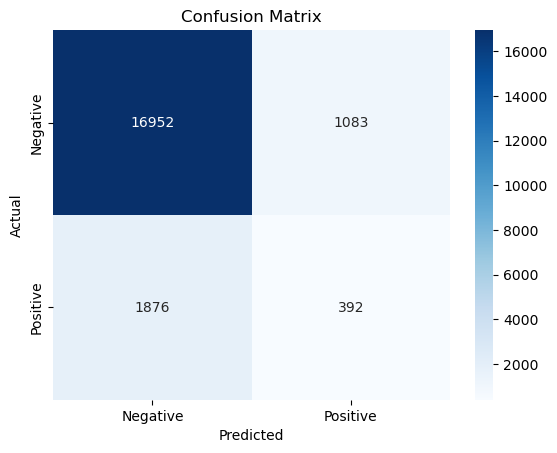

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score

params = {'bootstrap': False, 
          'criterion': 'gini', 
          'max_depth': 19, 
          'min_samples_leaf': 12, 
          'min_samples_split': 3, 
          'n_estimators': 199}
rf_classifier = RandomForestClassifier(**params)
rf_classifier.fit(X_train, y_train)
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print("F1 - {:.2f}, recall - {:.2f}".format(f1_train, recall_score(y_test, y_test_pred)))
print(f"F1 Score on Testing Data: {f1_test:.2f}")

labels = ['Negative', 'Positive']
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

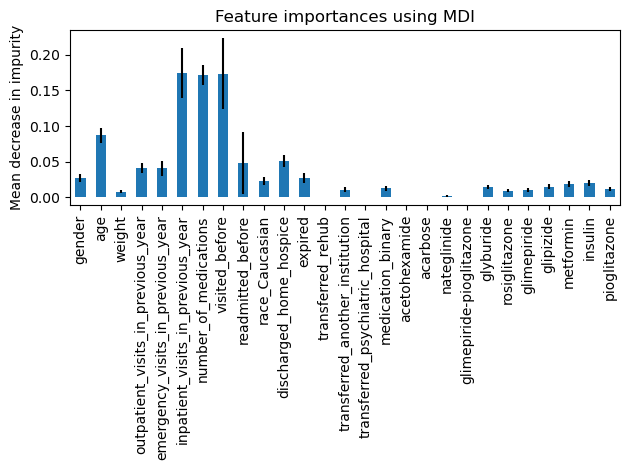

In [97]:
import pandas as pd


feature_names = [i for i in X_train.columns]
importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [103]:
X_final = df_test[['gender', 'age', 'weight',
       'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year',
       'number_of_medications',
       'visited_before',
       'readmitted_before',
       'race_Caucasian', 
       'discharged_home_hospice',
       'expired', 'transferred_rehub', 'transferred_another_institution',
       'transferred_psychiatric_hospital', 'medication_binary',
       'acetohexamide', 'acarbose', 'nateglinide', 'glimepiride-pioglitazone',
       'glyburide', 'rosiglitazone', 'glimepiride', 'glipizide', 'metformin',
       'insulin', 'pioglitazone', ]].fillna(0)

In [107]:
df_test['readmitted_binary'] = rf_classifier.predict(X_final)

In [113]:
df_test['readmitted_binary'].replace({1:'Yes', 0:'No'}, inplace = True)

In [117]:
df_test[['encounter_id', 'readmitted_binary']].to_csv('submit_baseline.csv', index = False)